# TODO
- #TODO: Clean validation data
- #TODO: 192x192
- #TODO: NO VALIDALTION ON augm
- TODO: 16 epoch nur Center + flip, dann mit R/L und ausblendfenster geradeaus

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from self_driving_car import model
from imp import reload
%matplotlib inline
reload(self_driving_car)
reload(self_driving_car.data_generator)
reload(self_driving_car.model)
print('reloaded')
MODEL = "simple4"

reloaded


Using TensorFlow backend.


# Training Episode 1 (beta sim, center only)

split data into 6031 training sample and 1508 validation samples
Number of samples:            37695
Number of active sample:      4524
Number of training samples:   4022
Number of validation samples: 502


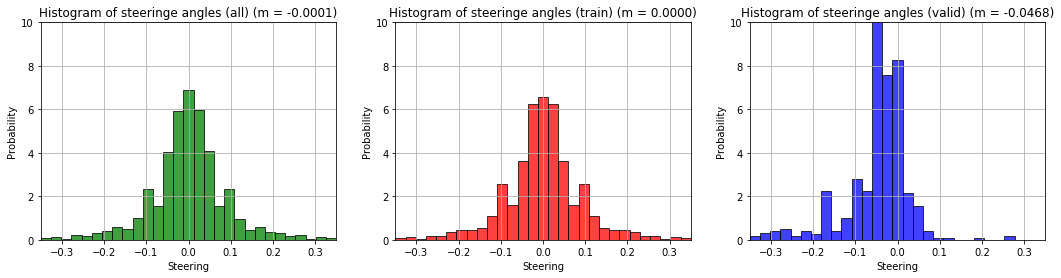

loading images to ram...
all images loaded to ram


In [2]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
#datagen.shuffle() # NO SHUFFLING!!
datagen.split(valid_size=0.2)
datagen.activate_mod('mod_flip')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.plot_stats()
datagen.load_img_to_ram()

In [3]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.train_generator(datagen, "20170212_A", nb_epoch = 14)
model.plot_history();

NameError: name 'yuv_colorspace' is not defined

# Training Episode 2 (beta sim, cam L/R)

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.40)
datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_A", 12)
model.train_generator(datagen, "20170212_B", nb_epoch = 6) # lr=0.01
model.plot_history();

# Training Episode 3 (udacity data) --> AB HIER WIRD ES SCHLIMMER

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.01, low_steering_remove_prop = 0.90)
datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_C", nb_epoch = 6) # lr=0.01
model.plot_history();

# Training Episode 4: refinement

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
#datagen.activate_mod('mod_lighting')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.50)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_C2", 12)
model.train_generator(datagen, "20170212_D3", nb_epoch = 8)
model.plot_history();

In [ ]:
1/0

# Training Episode 3 *alternativ* (backward data + beta)

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset5_beta_backwards")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.20)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 7)
model.train_generator(datagen, "20170212_C2", nb_epoch = 10) # lr=0.01
model.plot_history();

# ALT:

In [ ]:
1/0

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.shuffle() # KEIN SHUFFLE?!?
datagen.split(valid_size=0.2)
#datagen.deactivate_cam('L')
#datagen.deactivate_cam('R')
datagen.deactivate_mod('mod_blur')
datagen.deactivate_mod('mod_shadow')
#datagen.deactivate_mod('mod_flip')
datagen.deactivate_mod('mod_lighting')
if True:
#    datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#    datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.50)   
    datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!

In [ ]:
model.load_weights(session_name, epoch)
model.train_generator(datagen, "20170211_F3", nb_epoch = 4, lr = 0.008)
model.plot_history();

In [ ]:
import pydot_ng
from keras.utils.visualize_util import plot
model.model.summary()
plot(model.model, to_file=('doc/images/model_%s.png' % model.modelname))

# Model: Udacity
![model_udacity](./doc/images/model_udacity.png)

In [ ]:
datagen.normalizer = model.normalizer
vdata = datagen.get_valid_data()
print(vdata[0].shape)
s_pred = model.model.predict(vdata[0], batch_size=128)
print(s_pred.shape)

plt.figure(figsize=(18,4))
plt.plot(s_pred[:500:2]) # blau
plt.plot(vdata[1][:500:2]) # orange
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = np.random.randint(vdata[0].shape[0]);
    img = vdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s_pred[idx], vdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

In [ ]:
gen = datagen.get_batch_generator()
tdata = next(gen)
s2_pred = model.model.predict(tdata[0], batch_size=192)
plt.figure()
plt.plot(s2_pred[::2]) # blau
plt.plot(tdata[1][::2]) # orange
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = i;
    img = tdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s2_pred[idx], tdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

In [ ]:
datagen.data[np.logical_and(datagen.data.is_train, datagen.data.is_active)]

In [ ]:
#datagen.add_dataset("dataset1_udacity")
#datagen.add_dataset("dataset2_twe_one_lap")
#datagen.add_dataset("dataset3_ssz_one_lap")
##datagen.auto_prepare();
#datagen.smooth_steering(window=60); # <<<<<<<< das ist gut -- ne
# DAS WAR GUT:
#datagen.filter_data_not_moving()
#datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.03)
##datagen.filter_data_low_steering(low_steering_threshold = 0.04, low_steering_remove_prop = 0.4+0.1)
##datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.5+0.1)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.3)
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.6+0.1) #raus?
#datagen.correct_camera_steering(0.05)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.30) # NEW?
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.85) # <
#datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.85) # NEU (x2)
#datagen.correct_camera_steering(0.08)
#datagen.correct_camera_steering(0.18)
#datagen.activate_mod('mod_blur')
#datagen.activate_mod('mod_shadow') # UMSTELLEN AUF activate
#datagen.activate_mod('mod_lighting')